In [34]:
from datasets import load_dataset
from torchvision import transforms
import torch
from tqdm.auto import tqdm
import requests

In [2]:
imagenet = load_dataset(
    'Maysee/tiny-imagenet', 
    split='valid'
)

In [3]:
imagenet

Dataset({
    features: ['image', 'label'],
    num_rows: 10000
})

In [4]:
imagenet[0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=64x64>,
 'label': 0}

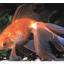

In [5]:
imagenet[0]['image']

In [6]:
imagenet[0]['image'].mode

'RGB'

In [7]:
imagenet[201]['image'].mode

'L'

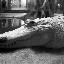

In [8]:
imagenet[201]['image']

In [11]:
imagenet[201]['image'].convert('RGB').mode

'RGB'

In [17]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
])

new_img = preprocess(imagenet[0]['image'])
new_img, new_img.mode

(<PIL.Image.Image image mode=RGB size=224x224>, 'RGB')

In [18]:
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

new_img = preprocess(new_img)
new_img

tensor([[[-1.7412, -1.7583, -1.7583,  ..., -1.7412, -1.7412, -1.7412],
         [-1.7583, -1.7754, -1.7754,  ..., -1.7754, -1.7754, -1.7754],
         [-1.7583, -1.7754, -1.7754,  ..., -1.7925, -1.7925, -1.7925],
         ...,
         [-0.9534, -0.9705, -0.9020,  ..., -0.5767, -0.5767, -0.5767],
         [-0.8678, -0.9192, -0.8849,  ..., -0.5253, -0.5082, -0.5082],
         [-0.3027, -0.3198, -0.2856,  ..., -0.4739, -0.4568, -0.4568]],

        [[-1.6856, -1.6856, -1.6856,  ..., -1.6506, -1.6506, -1.6506],
         [-1.7031, -1.7206, -1.7206,  ..., -1.6856, -1.6856, -1.6856],
         [-1.7031, -1.7206, -1.7206,  ..., -1.7031, -1.7031, -1.7031],
         ...,
         [-1.0728, -1.0728, -1.0028,  ..., -0.4776, -0.4776, -0.4776],
         [-0.9678, -1.0028, -0.9678,  ..., -0.4251, -0.4076, -0.4076],
         [-0.3725, -0.3901, -0.3550,  ..., -0.3725, -0.3550, -0.3550]],

        [[-1.4384, -1.4559, -1.4559,  ..., -1.4210, -1.4210, -1.4210],
         [-1.4559, -1.4733, -1.4733,  ..., -1

In [22]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

inputs = []

for image in tqdm(imagenet[:50]['image']):
    if image.mode != 'RGB':
        image = image.convert('RGB')
    
    input_tensor = preprocess(image)
    inputs.append(input_tensor)
    
inputs = torch.stack(inputs)

  0%|          | 0/50 [00:00<?, ?it/s]

In [23]:
inputs.size()

torch.Size([50, 3, 224, 224])

In [25]:
alexnet = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=True)
alexnet.eval()

Using cache found in /home/rafkat/.cache/torch/hub/pytorch_vision_v0.10.0
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /home/rafkat/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:04<00:00, 55.0MB/s] 


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [26]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [27]:
inputs = inputs.to(device)
alexnet.to(device)

with torch.no_grad():
    output = alexnet(inputs).detach()
print(output.shape)
output

torch.Size([50, 1000])


tensor([[ 8.1128, 14.6579, -0.1482,  ...,  5.8901,  1.3362, -5.4654],
        [ 2.7953,  9.3225,  2.4795,  ..., -1.7868, -0.1563, -1.7153],
        [ 7.3131, 16.8731,  1.3551,  ...,  3.2603,  0.8591, -3.7948],
        ...,
        [ 3.5161, 10.5389, -3.2762,  ...,  1.9821,  0.7347, -1.1566],
        [ 4.2825, 13.0660,  1.2166,  ..., -1.0016,  2.9048, -5.2172],
        [ 4.0025,  8.5582, -2.4834,  ...,  2.4887,  2.2094, -2.7812]],
       device='cuda:0')

In [33]:
output[0]

tensor([ 8.1128e+00,  1.4658e+01, -1.4818e-01,  1.2715e+00, -1.0063e+00,
         5.4766e+00, -4.6952e-01,  1.4090e+00, -1.2555e+00, -3.0016e+00,
         5.4489e+00,  6.1096e-01,  1.8069e+00, -1.8578e+00, -7.1579e-01,
         2.5898e+00,  1.5187e+00, -2.6541e+00, -1.9996e+00, -2.1475e+00,
        -2.5206e+00,  1.2210e+00, -5.0247e+00, -1.3825e+00, -4.7052e+00,
         1.9898e+00,  7.7783e+00,  7.8809e+00,  4.0273e+00,  9.8344e+00,
        -4.2260e-01,  1.6606e+00,  7.2175e+00,  6.8505e-01,  1.9568e+00,
         1.9407e+00,  1.5533e+00, -2.0688e+00,  6.3837e+00, -9.0402e-01,
         1.1223e+00,  2.4345e+00,  5.1284e+00,  6.8614e+00, -1.0393e-02,
        -3.3689e+00, -3.6230e+00,  4.4006e+00, -2.0178e+00, -1.2557e-01,
        -1.8693e+00,  6.2367e+00,  1.4437e+00,  9.2866e-01,  5.5408e-02,
        -5.6283e+00,  8.1340e-01, -2.0667e+00, -3.5355e+00,  2.0348e+00,
         2.0195e+00, -2.3053e+00,  2.6271e+00,  3.6889e+00,  1.8825e-01,
         1.2250e+00,  1.4646e+00, -3.8001e+00,  3.3

In [28]:
preds = torch.argmax(output, dim=1).cpu().numpy()
print(preds.shape)
preds

(50,)


array([  1,   1,   1,   1, 392,   1, 149,   1, 392,   1,   1,   1, 782,
         1, 392,  73, 392,   1,  29, 973, 392,  73, 995,   1,   1,   1,
         1, 206,   1,   1,   1,   1,   1,   1,   1,   1, 335,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1])

In [35]:
classes = requests.get('https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt')

In [36]:
pred_labels = classes.text.split('\n')
print(pred_labels[1])

goldfish


In [37]:
sum(preds == 1) / len(preds)

np.float64(0.72)